Обучение "без учителя" в Scikit-learn

In [3]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите Boston House Prices dataset из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [6]:
# Устанавливаем пакеты, импортируем библиотеки 
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Для отображения графиков прямо в ноутбуке
%matplotlib inline
# Для более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'
# Для раазбиения выборки на тренировочнию и тестовую
from sklearn.model_selection import train_test_split
# Для стандартизации
from sklearn.preprocessing import StandardScaler
# Для блокировки warnings
import warnings
warnings.filterwarnings('ignore')
# Для формата вывода чисел float
pd.set_option('display.float_format', '{:.2f}'.format)

# Загрузим датасет Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Задаем название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем в датафрейм
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

# Выведим загруженные данные в датафрейме X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [7]:
# Определим размер датафрейма
X.shape

(506, 13)

In [8]:
# Определим тип данных
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
# Определим пропущенные значения
X.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
# Выведем статистику
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [11]:
# Выведем info о датафрейме y
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [12]:
# Выведем статистику
y.describe()

,price
count,506.00
mean,22.53
std,9.20
min,5.00
25%,17.02
50%,21.20
75%,25.00
max,50.00


In [13]:
# Выведем голову датасета
y.head()

,price
0,24.00
1,21.60
2,34.70
3,33.40
4,36.20


In [14]:
# Разобьём выборку на тренировочную (80%) и тестовую (20%), установим random_state 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные с помощью StandardScaler.
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min)
# StandardScaler() Для каждой фичи х делает: (x - mean) / std
# RobustScaler() Для каждой фичи х делает: (x - median) / (q75 - q25)
scaler = StandardScaler()
colnames = X.columns
# Метод .fit_transform() сразу вычисляет статистические показатели и применяет их для масштабирования данных.
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
# Метод .transform() соответственно использует рассчитанные значения среднего и СКО для стандартизации данных.
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames)
X_train_scaled.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.29,-0.50,1.03,-0.28,0.49,-1.43,1.03,-0.80,1.71,1.58,0.85,-0.07,1.75
1,-0.34,-0.50,-0.41,-0.28,-0.16,-0.68,-0.43,0.32,-0.62,-0.58,1.20,0.43,-0.56


In [15]:
# Выведем статистику по X_train_scaled
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.50,-1.49,-0.28,-1.46,-3.46,-2.35,-1.26,-0.97,-1.31,-2.57,-3.89,-1.51
25%,-0.40,-0.50,-0.85,-0.28,-0.89,-0.60,-0.82,-0.81,-0.62,-0.75,-0.68,0.21,-0.80
50%,-0.38,-0.50,-0.35,-0.28,-0.16,-0.15,0.33,-0.30,-0.51,-0.45,0.17,0.38,-0.22
75%,-0.05,0.36,1.03,-0.28,0.63,0.45,0.90,0.75,0.31,1.58,0.85,0.43,0.55
max,9.63,3.82,2.43,3.60,2.68,3.48,1.12,3.91,1.71,1.85,1.65,0.44,3.59


In [16]:
# Выведем статистику по X_test_scaled
X_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.00,-0.04,0.11,-0.05,-0.08,-0.22,0.00,-0.03,0.11,0.13,0.31,0.02,0.14
std,0.84,1.04,0.98,0.92,0.92,0.94,1.03,0.94,1.07,1.07,0.81,0.99,1.02
min,-0.41,-0.50,-1.53,-0.28,-1.40,-3.89,-2.23,-1.24,-0.97,-1.30,-2.39,-3.82,-1.35
25%,-0.40,-0.50,-0.71,-0.28,-0.92,-0.63,-0.89,-0.73,-0.62,-0.74,0.04,0.20,-0.67
50%,-0.38,-0.50,-0.06,-0.28,-0.21,-0.21,0.22,-0.21,-0.51,-0.36,0.40,0.39,-0.02
75%,0.10,-0.50,1.03,-0.28,0.55,0.23,0.95,0.45,1.71,1.58,0.85,0.44,0.78
max,4.75,3.61,2.43,3.60,2.68,2.42,1.12,3.24,1.71,1.85,1.65,0.44,3.45


In [20]:
# Алгоритм t-SNE (t-distributed Stochastic Neighbor Embedding 
# или Стохастическое вложение соседей с t-распределением) 
# позволяет понижать размерность данных до двух или трёх измерений, 
# что позволяет визуализировать данные на двумерных и трёхмерных графиках. 
# Изучая графики, можно, например, понять, на сколько кластеров адекватно разбивать данные,
# а также оценить уже выполненное разбиение на кластеры.

# Построим модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42, n_components=2, learning_rate=250)

X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


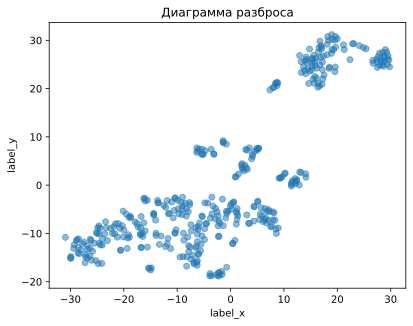

In [22]:
# Визуализируем данные
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], cmap=plt.get_cmap('jet'), alpha=0.5)
plt.xlabel('label_x')
plt.ylabel('label_y')
plt.title('Диаграмма разброса')

plt.show()

In [24]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.

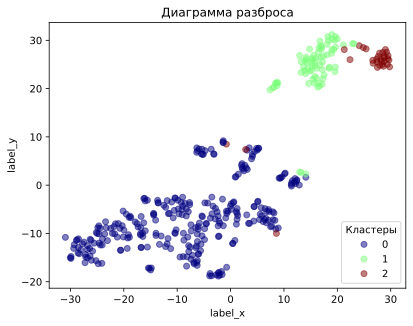

In [25]:
from sklearn.cluster import KMeans

# Создадим объект kmeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
# Разобьём на 3 кластера X_train
cluster_train = kmeans.fit_predict(X_train)
# Создадим фигуру и подзаголовок
fig, ax = plt.subplots()
# Создадим scatter
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_train, cmap=plt.get_cmap('jet'), alpha=0.5)
# Создадим legend
ax.legend(*scatter.legend_elements(), loc="lower right", title="Кластеры")
plt.xlabel('label_x')
plt.ylabel('label_y')
plt.title('Диаграмма разброса')

plt.show()

In [26]:
# Соединим датафреймы X_train и y_train
X_train_copy = pd.concat([X_train, y_train], axis=1)
# Добавим столбец с кластером
X_train_copy['cluster'] = cluster_train
# Выведем mean цену и CRIM в зависимости от кластера, а также count домов в каждом кластере
X_train_copy.groupby('cluster').agg({"price": "mean", "CRIM": "mean", "NOX": "count"}).sort_values(by="CRIM")

,price,CRIM,NOX
cluster,,,
0,25.17,0.40,297
1,17.44,11.75,76
2,13.20,14.36,31


In [ ]:
# Вывод: Чем выше цена тем, меньше криминальность